In [1]:
import numpy as np
from EM import NiftiManager, Evaluate, EM

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

In [2]:
NM                      = NiftiManager()
EVAL                    = Evaluate()

**KMeans Init** 

2023-11-11 20:55:12.485 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:55:13.430 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'kmeans'.
2023-11-11 20:55:18.949 | INFO     | EM:fit:890 - Iterations performed: 20. Generating segmentation results.
2023-11-11 20:55:19.384 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.5935510800375339
GM DICE:  0.9076451140784954
WM DICE:  0.8998637662440961


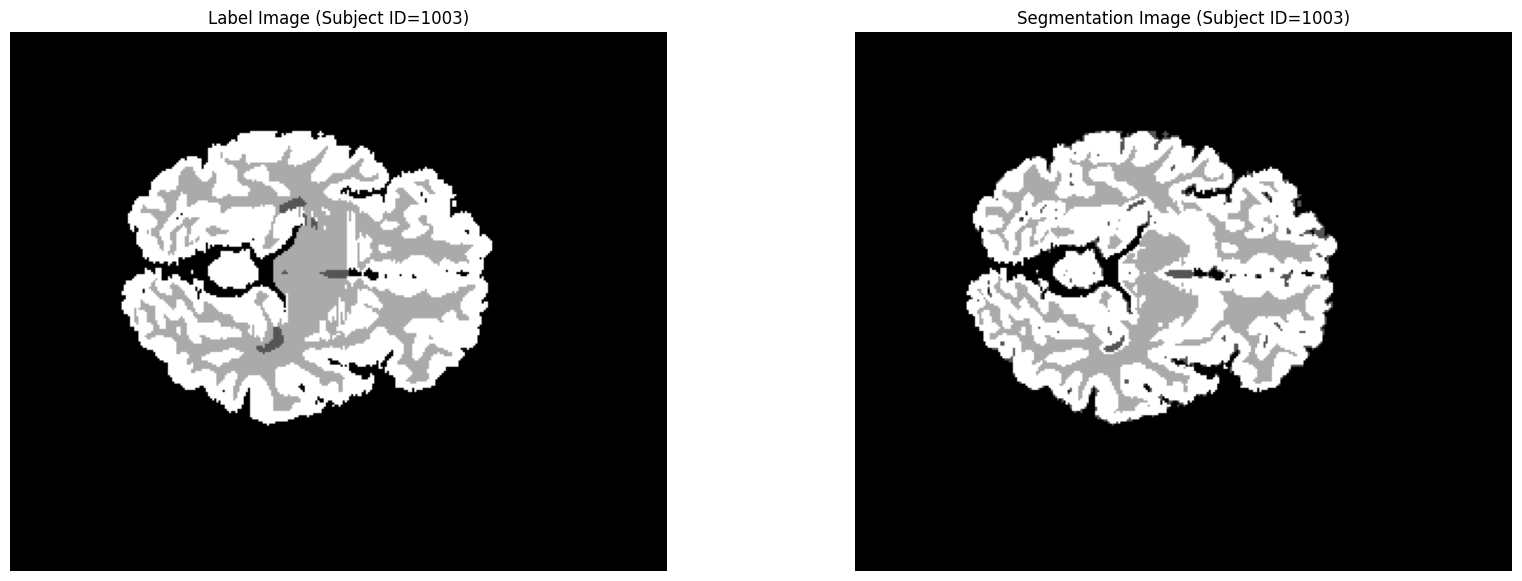

In [3]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "kmeans",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True
)


# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Tissue Models Init** 

2023-11-11 20:55:27.131 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:55:27.983 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'tissue_models'.
2023-11-11 20:55:34.920 | INFO     | EM:fit:890 - Iterations performed: 20. Generating segmentation results.
2023-11-11 20:55:35.375 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8285704813684501
GM DICE:  0.9349867625070252
WM DICE:  0.8877938540606878


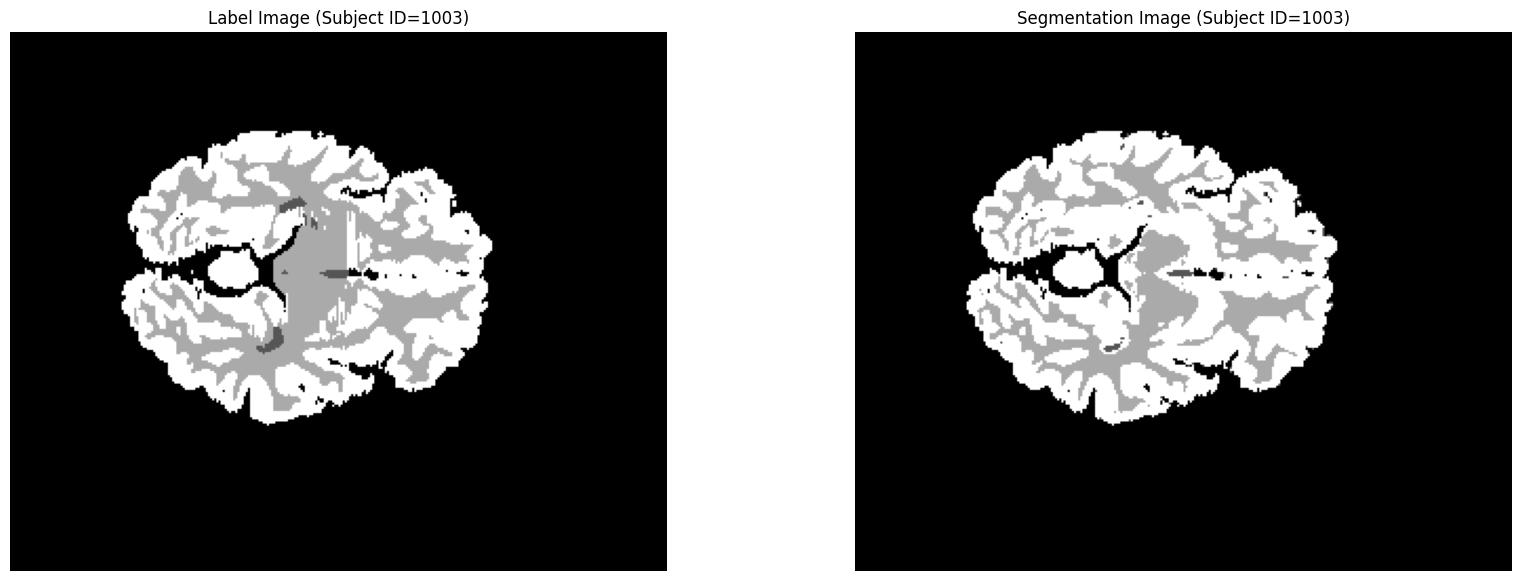

In [4]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Atlas Init**

2023-11-11 20:56:20.235 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:56:21.146 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'atlas'.
2023-11-11 20:56:23.849 | INFO     | EM:fit:890 - Iterations performed: 1. Generating segmentation results.
2023-11-11 20:56:24.286 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8049813574761869
GM DICE:  0.9243151133215841
WM DICE:  0.893537142375669


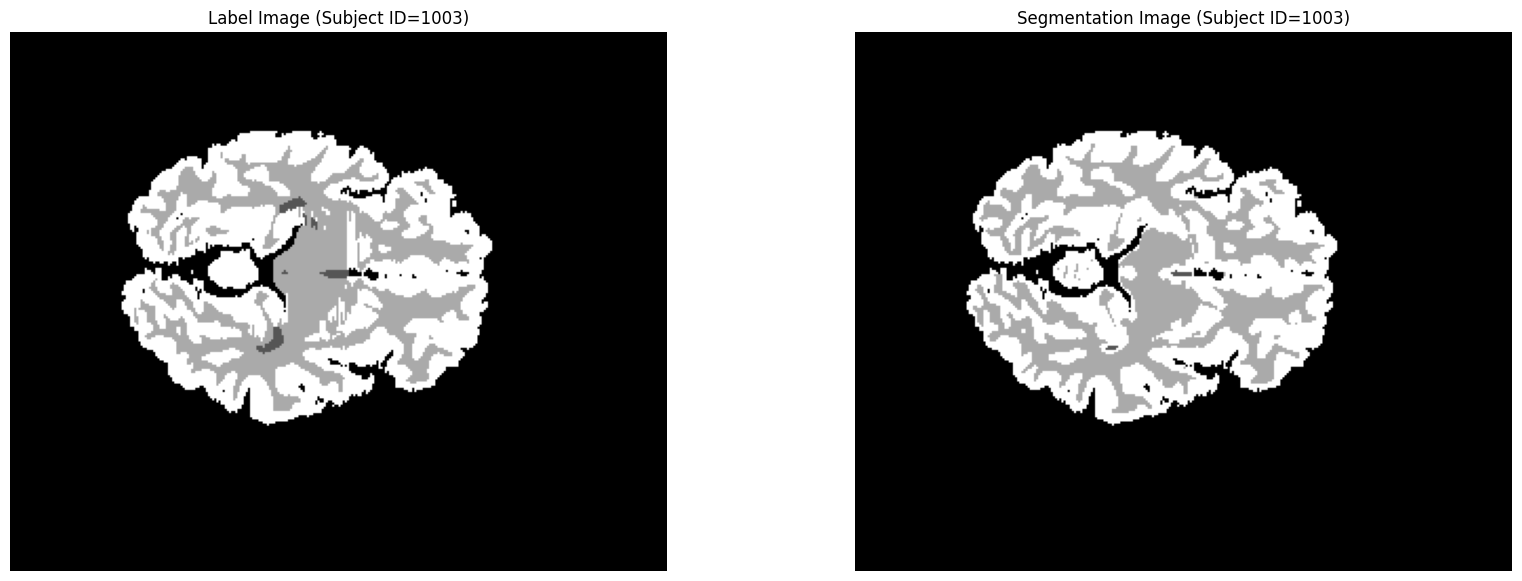

In [6]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    atlas_csf = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Initializing using both tissue models and atlases**

2023-11-11 20:56:44.193 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:56:45.674 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-11 20:56:54.889 | INFO     | EM:fit:890 - Iterations performed: 20. Generating segmentation results.
2023-11-11 20:56:55.322 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.7288031986851792
GM DICE:  0.9313101996641924
WM DICE:  0.8877920954262787


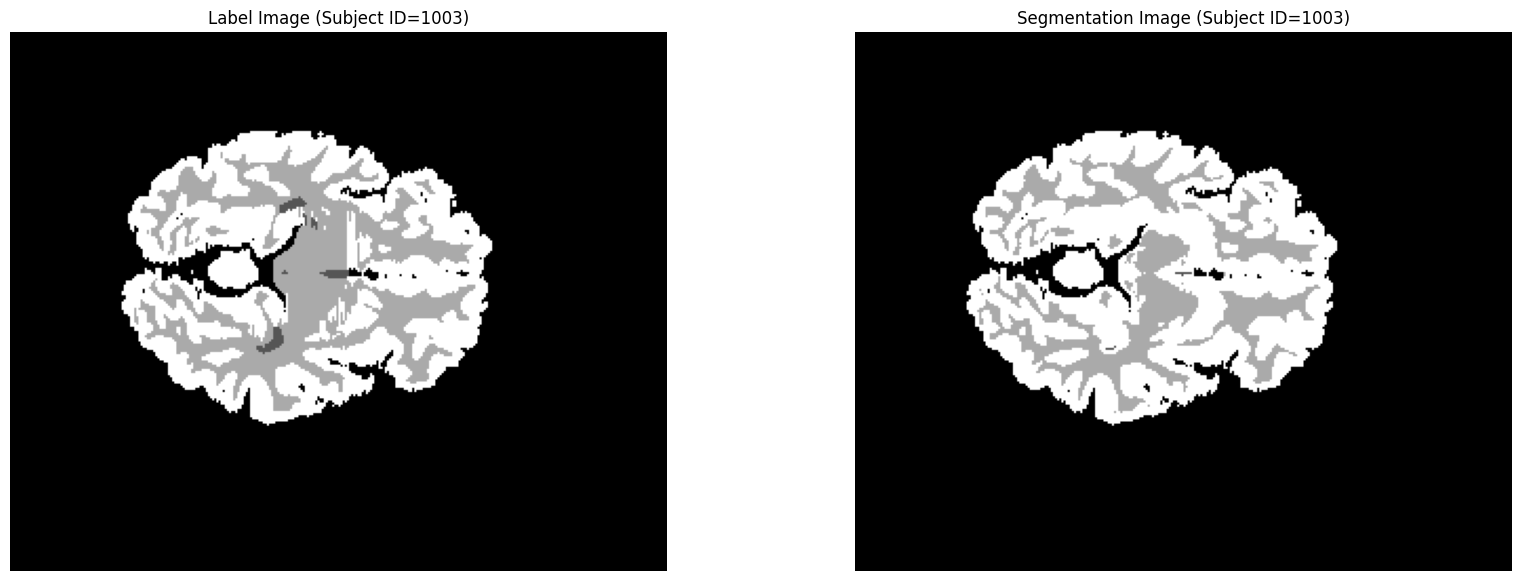

In [7]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_gm/result.nii')[0]
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

**Including atlas using a posteriori method**

2023-11-11 20:57:09.185 | INFO     | EM:fit:862 - Starting the algorithm. 20 iterations were initialized.
2023-11-11 20:57:10.024 | INFO     | EM:initialize_parameters:622 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-11 20:57:17.306 | INFO     | EM:fit:887 - Including atlas probabilities into EM result using posteriori method.
2023-11-11 20:57:17.314 | INFO     | EM:fit:890 - Iterations performed: 20. Generating segmentation results.
2023-11-11 20:57:17.748 | INFO     | EM:correct_pred_labels:816 - Finished segmentation. Correcting prediction labels.


CSF DICE:  0.8099541147306825
GM DICE:  0.9536314474497719
WM DICE:  0.9186150814106292


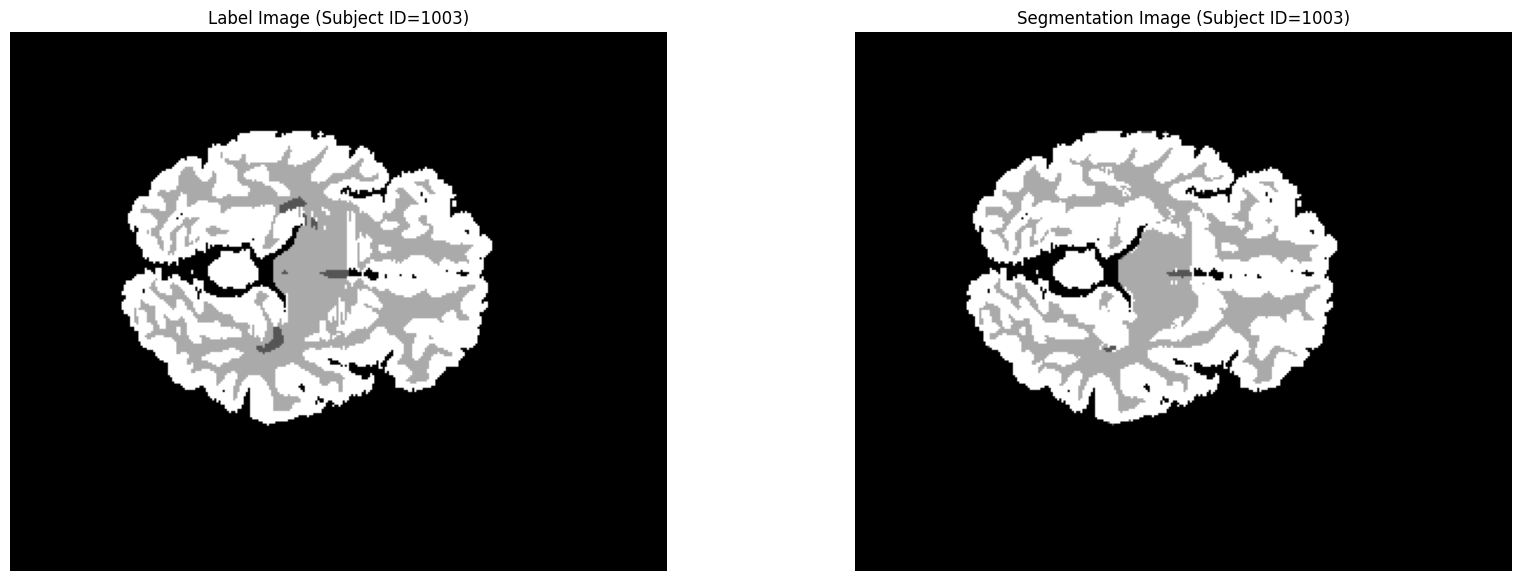

In [8]:
t1_path         = 'test-set/testing-images/1025.nii.gz'
labels_gt_file  = 'test-set/testing-labels/1025_3C.nii.gz'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_csf/result.nii')[0],
    atlas_wm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_wm/result.nii')[0],
    atlas_gm  = NM.load_nifti('output/labels/output_1025/atlas_outputs/mean_gm/result.nii')[0],
    include_atlas = 'posteriori'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)